QUESTION 1 :

In [3]:
import pandas as pd

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Display the first few rows and column names
print(df.head())
print(df.columns)


           hour_beginning         location  Pedestrians  Towards Manhattan  \
0  04/30/2019 12:00:00 AM  Brooklyn Bridge            3                  3   
1  12/31/2019 10:00:00 PM  Brooklyn Bridge           10                  9   
2  12/31/2019 11:00:00 PM  Brooklyn Bridge            2                  0   
3  12/31/2019 09:00:00 PM  Brooklyn Bridge           12                  0   
4  04/01/2019 03:00:00 AM  Brooklyn Bridge            1                  0   

   Towards Brooklyn weather_summary  temperature  precipitation        lat  \
0                 0             NaN          NaN            NaN  40.708164   
1                 1          cloudy         42.0         0.0005  40.708164   
2                 2          cloudy         42.0         0.0004  40.708164   
3                12          cloudy         42.0         0.0036  40.708164   
4                 1     clear-night         36.0         0.0000  40.708164   

        long events                              Location1  
0

/var/folders/73/4l1hsjs571387y9wktwsjsz00000gn/T/ipykernel_46898/2579743798.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


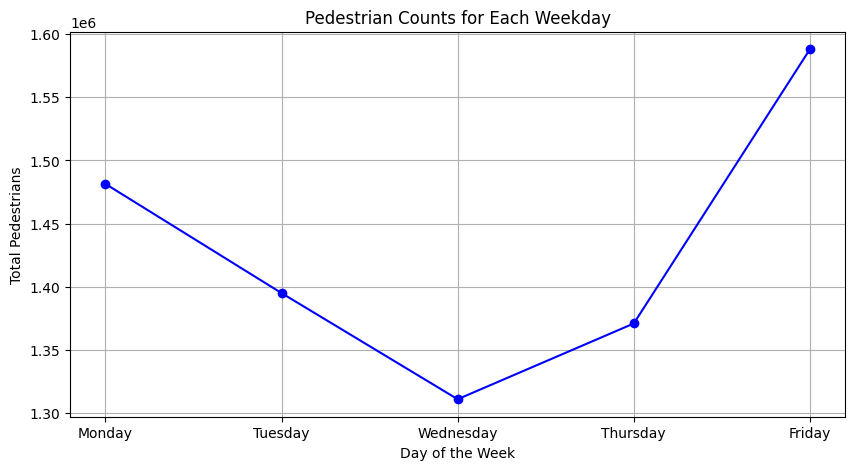

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)


df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


df['DayOfWeek'] = df['hour_beginning'].dt.day_name()


weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['DayOfWeek'].isin(weekdays)]


pedestrian_counts = df_weekdays.groupby('DayOfWeek')['Pedestrians'].sum()


pedestrian_counts = pedestrian_counts.reindex(weekdays)

# Plot the pedestrian counts
plt.figure(figsize=(10, 5))
plt.plot(pedestrian_counts.index, pedestrian_counts.values, marker='o', linestyle='-', color='b')

plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrians')
plt.title('Pedestrian Counts for Each Weekday')
plt.grid(True)

# Show the plot
plt.show()


QUESTION 2 

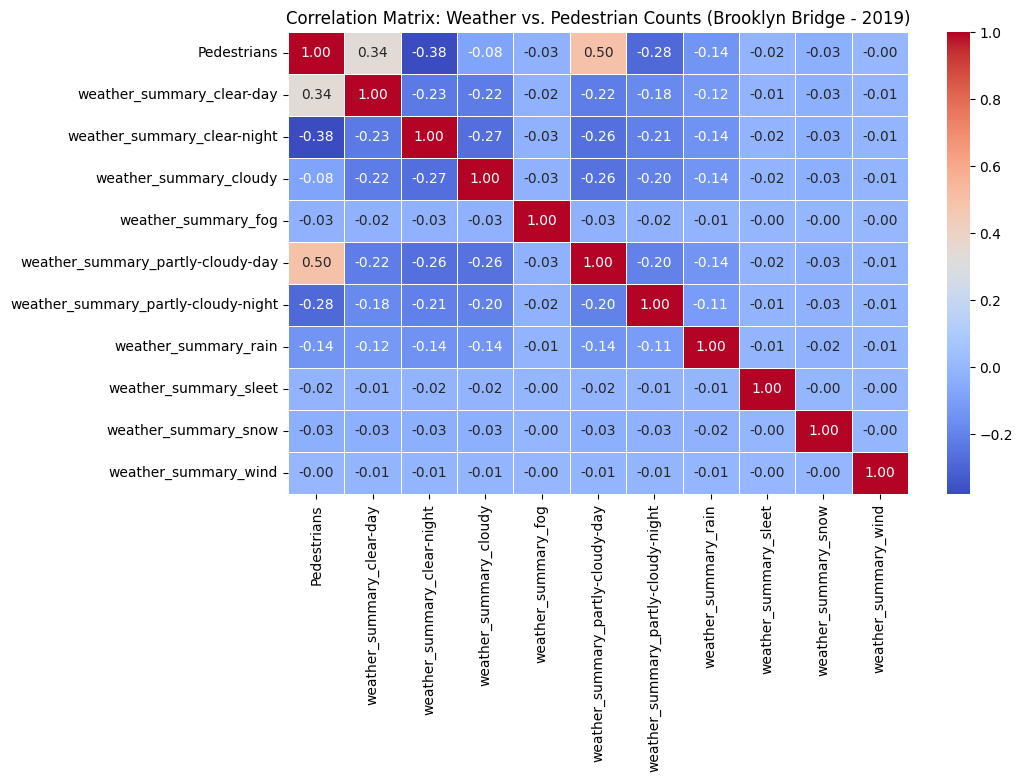

In [ ]:
import seaborn as sns

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


df_2019 = df[(df['hour_beginning'].dt.year == 2019) & (df['location'] == 'Brooklyn Bridge')]


df_2019 = df_2019.dropna(subset=['weather_summary'])


df_encoded = pd.get_dummies(df_2019, columns=['weather_summary'])


correlation_matrix = df_encoded[['Pedestrians'] + list(df_encoded.filter(like='weather_summary'))].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Weather vs. Pedestrian Counts (Brooklyn Bridge - 2019)")
plt.show()

QUESTION 3 

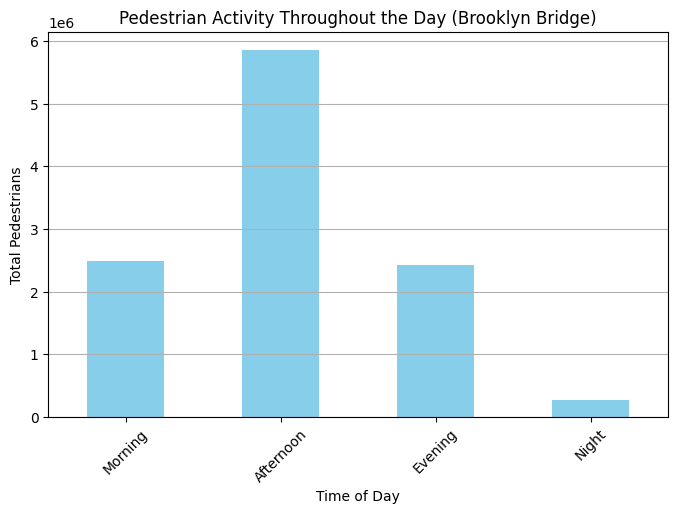

In [ ]:



df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


df['TimeOfDay'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)


time_of_day_activity = df.groupby('TimeOfDay')['Pedestrians'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Plot the pedestrian activity for each time of day
plt.figure(figsize=(8, 5))
time_of_day_activity.plot(kind='bar', color='skyblue')
plt.title('Pedestrian Activity Throughout the Day (Brooklyn Bridge)')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrians')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()
